<a href="https://colab.research.google.com/github/A23929/MDSC-302-Assignments/blob/main/22237_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
import torch
from torch.utils.data import Dataset,random_split
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import os

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aniruddhapadmanaban","key":"f9fdfef7b2009572f9a4768f540991fd"}'}

In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                        title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                    Most Streamed Spotify Songs 2023                47KB  2023-08-26 11:04:57           8889        292  1.0              
josephinelsy/spotify-top-hit-playlist-2010-2022            Spotify Top Hit Playlist (2010-2022)           210KB  2023-09-08 06:11:44           1581         47  1.0              
nelgiriyewithana/global-youtube-statistics-2023            Global YouTube Statistics 2023                  60KB  2023-07-28 15:36:38          18592        585  1.0              
muhammadtalhaawan/world-export-and-import-dataset          World Export & Import Dataset (1989 - 2023)    721K

In [ ]:
! kaggle competitions download -c Kannada-MNIST

  0% 0.00/12.4M [00:00<?, ?B/s]
100% 12.4M/12.4M [00:00<00:00, 132MB/s]


In [ ]:
! mkdir Kannada-MNIST

In [ ]:
! unzip Kannada-MNIST.zip -d Kannada-MNIST

Archive:  Kannada-MNIST.zip
  inflating: Kannada-MNIST/Dig-MNIST.csv  
  inflating: Kannada-MNIST/sample_submission.csv  
  inflating: Kannada-MNIST/test.csv  
  inflating: Kannada-MNIST/train.csv  


In [ ]:
training_data = pd.read_csv('/content/Kannada-MNIST/train.csv')
test_data = pd.read_csv('/content/Kannada-MNIST/test.csv')

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class K(Dataset):
    def __init__(self, df, transform=None, target_transform=None):
        self.img_labels = df.iloc[:,0]
        # self.data = df.iloc[:,1:]
        self.transform = transform
        self.target_transform = target_transform
        self.df = df

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        # img_path = os.path.join(self.img_labels.iloc[idx, 0])
        image = torch.tensor((self.df.iloc[idx,1:].values))
        label = self.img_labels.iloc[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [ ]:
tr = K(training_data)

In [ ]:
ts = K(training_data)

In [ ]:
train_size = int(0.9*(len(tr)))
val_size = len(tr) - train_size
train_set, val_set = random_split(tr, [train_size, val_size])

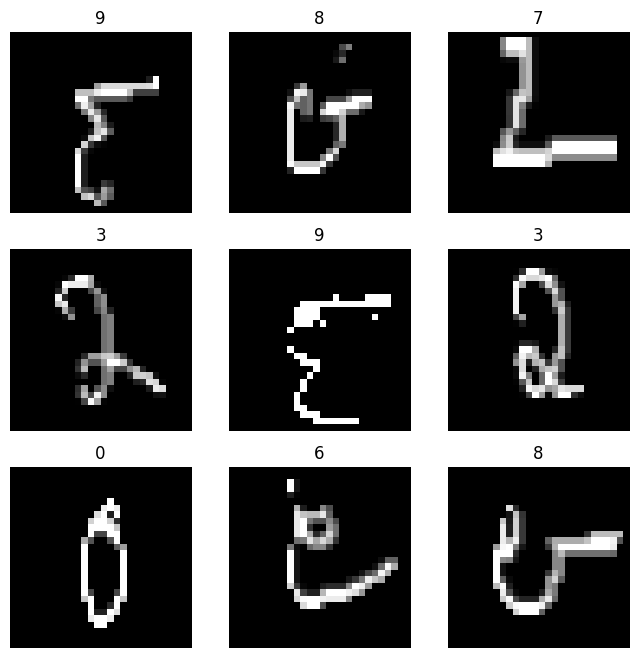

In [ ]:
labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_set), size=(1,)).item()
    img, label = train_set[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.reshape(28,28).squeeze(), cmap="gray")
plt.show()

In [ ]:
from torch.utils.data import DataLoader, random_split

train_dataloader = DataLoader(train_set, batch_size=64, shuffle=True)
test_dataloader = DataLoader(ts, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_set,batch_size = 64,shuffle=True)

Feature batch shape: torch.Size([64, 784])
Labels batch shape: torch.Size([64])


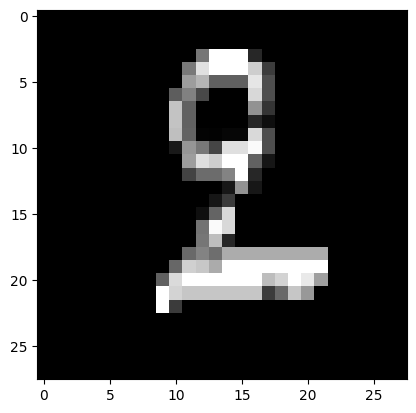

Label: 7


In [ ]:
train_features,train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].reshape(28,28).squeeze()
label = train_labels[0]
plt.imshow(img,cmap='gray')
plt.show()
print(f"Label: {label}")

In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
import torch.nn.functional as F

## Without batch normalization

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28,4096)
        self.fc2 = nn.Linear(4096,512)
        self.fc3 = nn.Linear(512,256)

    def forward(self, x):
        x = F.relu(self.fc1(x.float()))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

In [ ]:
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
)


In [ ]:
learning_rate = 1e-3
batch_size = 64
epochs = 10

In [ ]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
model.cuda()

NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
)

In [ ]:
device = torch.device("cuda:0")
model.to(device)

NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
)

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  # Set the model to training mode - important for batch normalization and dropout layers
  # Unnecessary in this situation but added for best practices
  model.train()
  for batch, (X, y) in enumerate(dataloader):
    X = X.cuda()
    y = y.cuda()
    # Compute prediction and loss
    pred = model(X)
    loss = loss_fn(pred, y)

    # Backpropagation
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if batch % 100 == 0:
      loss, current = loss.item(), (batch + 1) * len(X)
      print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
  # Set the model to evaluation mode - important for batch normalization and dropout layers
  # Unnecessary in this situation but added for best practices
  model.eval()
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0, 0

  # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
  # Also serves to reduce unnecessary gradient computations and memory usage for tensors
  with torch.no_grad():
    for X, y in dataloader:
      X = X.cuda()
      y = y.cuda()
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test error : \n Accuracy: {(100 * correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

def val_loop(dataloader, model, loss_fn):
  # Set the model to evaluation mode - important for batch normalization and dropout layers
  # Unnecessary in this situation but added for best practices
  model.eval()
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0, 0

  # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
  # Also serves to reduce unnecessary gradient computations and memory usage for tensors
  with torch.no_grad():
    for X, y in dataloader:
      X = X.cuda()
      y = y.cuda()
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Validation error : \n Accuracy: {(100 * correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
for t in range(epochs):
  print(f"Epoch {t+1}\n------------------------------------------")
  train_loop(train_dataloader, model, loss_fn, optimizer)
  val_loop(val_dataloader, model, loss_fn )

test_loop(test_dataloader, model, loss_fn)

Epoch 1
------------------------------------------
loss: 0.026330 [   64/54000]
loss: 0.043182 [ 6464/54000]
loss: 0.013756 [12864/54000]
loss: 0.006894 [19264/54000]
loss: 0.006706 [25664/54000]
loss: 0.005094 [32064/54000]
loss: 0.013635 [38464/54000]
loss: 0.024936 [44864/54000]
loss: 0.006786 [51264/54000]
Validation error : 
 Accuracy: 98.2%, Avg loss: 0.062068 

Epoch 2
------------------------------------------
loss: 0.007065 [   64/54000]
loss: 0.008490 [ 6464/54000]
loss: 0.010449 [12864/54000]
loss: 0.004497 [19264/54000]
loss: 0.003842 [25664/54000]
loss: 0.016187 [32064/54000]
loss: 0.002046 [38464/54000]
loss: 0.010787 [44864/54000]
loss: 0.004069 [51264/54000]
Validation error : 
 Accuracy: 98.3%, Avg loss: 0.056562 

Epoch 3
------------------------------------------
loss: 0.003437 [   64/54000]
loss: 0.003135 [ 6464/54000]
loss: 0.008052 [12864/54000]
loss: 0.014641 [19264/54000]
loss: 0.005423 [25664/54000]
loss: 0.007154 [32064/54000]
loss: 0.002300 [38464/54000]
loss

## With batch normalization

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28,4096)
        self.bn1 = nn.BatchNorm1d(4096)
        self.fc2 = nn.Linear(4096,512)
        self.bn2 = nn.BatchNorm1d(512)
        self.fc3 = nn.Linear(512,256)

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x.float())))
        x = F.relu(self.bn2(self.fc2(x)))
        return self.fc3(x)

In [ ]:
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=4096, bias=True)
  (bn1): BatchNorm1d(4096, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=4096, out_features=512, bias=True)
  (bn2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
)


In [ ]:
learning_rate = 1e-3
batch_size = 64
epochs = 10

In [ ]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
model.cuda()

NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=4096, bias=True)
  (bn1): BatchNorm1d(4096, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=4096, out_features=512, bias=True)
  (bn2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
)

In [ ]:
device = torch.device("cuda:0")
model.to(device)

NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=4096, bias=True)
  (bn1): BatchNorm1d(4096, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=4096, out_features=512, bias=True)
  (bn2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
)

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  # Set the model to training mode - important for batch normalization and dropout layers
  # Unnecessary in this situation but added for best practices
  model.train()
  for batch, (X, y) in enumerate(dataloader):
    X = X.cuda()
    y = y.cuda()
    # Compute prediction and loss
    pred = model(X)
    loss = loss_fn(pred, y)

    # Backpropagation
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if batch % 100 == 0:
      loss, current = loss.item(), (batch + 1) * len(X)
      print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
  # Set the model to evaluation mode - important for batch normalization and dropout layers
  # Unnecessary in this situation but added for best practices
  model.eval()
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0, 0

  # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
  # Also serves to reduce unnecessary gradient computations and memory usage for tensors
  with torch.no_grad():
    for X, y in dataloader:
      X = X.cuda()
      y = y.cuda()
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test error : \n Accuracy: {(100 * correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

def val_loop(dataloader, model, loss_fn):
  # Set the model to evaluation mode - important for batch normalization and dropout layers
  # Unnecessary in this situation but added for best practices
  model.eval()
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0, 0

  # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
  # Also serves to reduce unnecessary gradient computations and memory usage for tensors
  with torch.no_grad():
    for X, y in dataloader:
      X = X.cuda()
      y = y.cuda()
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Validation error : \n Accuracy: {(100 * correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
for t in range(epochs):
  print(f"Epoch {t+1}\n------------------------------------------")
  train_loop(train_dataloader, model, loss_fn, optimizer)
  val_loop(val_dataloader, model, loss_fn )

test_loop(test_dataloader, model, loss_fn)

Epoch 1
------------------------------------------
loss: 5.710872 [   64/54000]
loss: 0.220550 [ 6464/54000]
loss: 0.080759 [12864/54000]
loss: 0.050463 [19264/54000]
loss: 0.181262 [25664/54000]
loss: 0.020371 [32064/54000]
loss: 0.086194 [38464/54000]
loss: 0.017826 [44864/54000]
loss: 0.071427 [51264/54000]
Validation error : 
 Accuracy: 98.6%, Avg loss: 0.052232 

Epoch 2
------------------------------------------
loss: 0.013205 [   64/54000]
loss: 0.011676 [ 6464/54000]
loss: 0.078105 [12864/54000]
loss: 0.010759 [19264/54000]
loss: 0.066089 [25664/54000]
loss: 0.010371 [32064/54000]
loss: 0.052798 [38464/54000]
loss: 0.013600 [44864/54000]
loss: 0.005797 [51264/54000]
Validation error : 
 Accuracy: 98.4%, Avg loss: 0.050273 

Epoch 3
------------------------------------------
loss: 0.006109 [   64/54000]
loss: 0.027266 [ 6464/54000]
loss: 0.017294 [12864/54000]
loss: 0.025445 [19264/54000]
loss: 0.067577 [25664/54000]
loss: 0.110610 [32064/54000]
loss: 0.109966 [38464/54000]
loss